In [1]:
%matplotlib inline

%run heatmap_preprocess.py

# 박테리아

- (TODO) dilution_text, dilution_comparison, dilution_value, interpretation 컬럼의 의미가 뭘까?

In [46]:
df = pd.read_sql("""
select subject_id, charttime, org_name, ab_name, dilution_text, dilution_comparison, dilution_value, interpretation
from microbiologyevents
where spec_type_desc = 'BLOOD CULTURE'
    and lower(org_name) similar to '%%(pseudomonas|aeruginosa|staphylococcus|aureus|escherichia|coli)%%'
    and ab_itemid is not null
""".format(subject_id), engine)

In [47]:
df.shape

(32934, 8)

In [48]:
df.head(10)

,subject_id,charttime,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,109,2140-04-28 14:45:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",GENTAMICIN,<=0.5,<=,1.0,S
1,109,2140-04-28 14:45:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",OXACILLIN,<=0.25,<=,0.0,S
2,109,2140-04-28 14:45:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",LEVOFLOXACIN,=>8,=>,8.0,R
3,109,2140-04-28 14:45:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",ERYTHROMYCIN,=>8,=>,8.0,R
4,109,2140-04-28 14:45:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",PENICILLIN,0.25,=,0.0,R
5,109,2140-05-17 15:56:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",PENICILLIN,=>0.5,=>,1.0,R
6,109,2140-05-17 15:56:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",ERYTHROMYCIN,=>8,=>,8.0,R
7,109,2140-05-17 15:56:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",GENTAMICIN,<=0.5,<=,1.0,S
8,109,2140-08-25 11:20:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",LEVOFLOXACIN,=>8,=>,8.0,R
9,109,2140-08-25 11:20:00,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",RIFAMPIN,<=0.5,<=,1.0,S


### 박테리아와 항생제 조합

- 총 149개 조합
- (TODO) 보미님 검증 필요

In [49]:
df.groupby(['org_name', 'ab_name']).size().sort_values(ascending=False)

org_name                                                   ab_name             
STAPHYLOCOCCUS, COAGULASE NEGATIVE                         ERYTHROMYCIN            1751
                                                           OXACILLIN               1751
                                                           GENTAMICIN              1751
                                                           LEVOFLOXACIN            1748
                                                           VANCOMYCIN              1459
                                                           TETRACYCLINE            1455
                                                           CLINDAMYCIN             1421
                                                           RIFAMPIN                1352
                                                           PENICILLIN              1152
STAPH AUREUS COAG +                                        OXACILLIN               1115
                                        

# Microbiology 추가한 환자의 heatmap

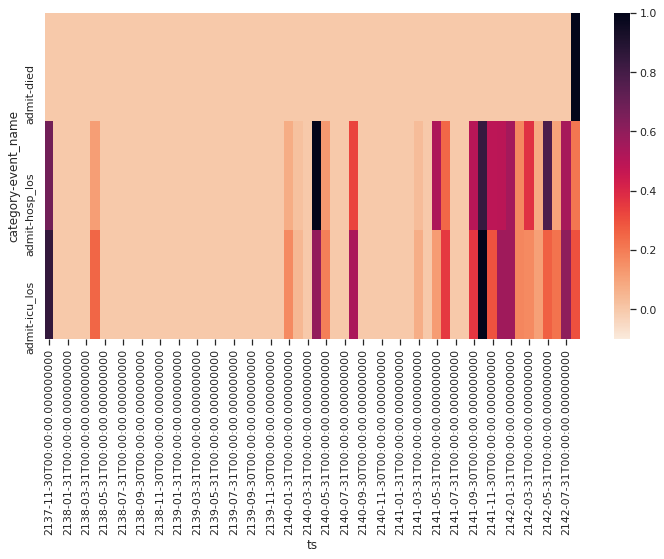

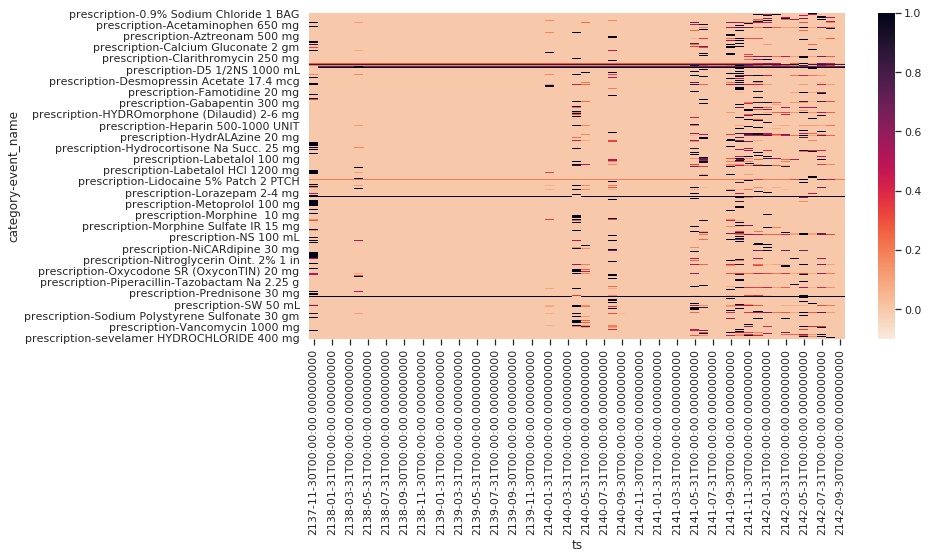

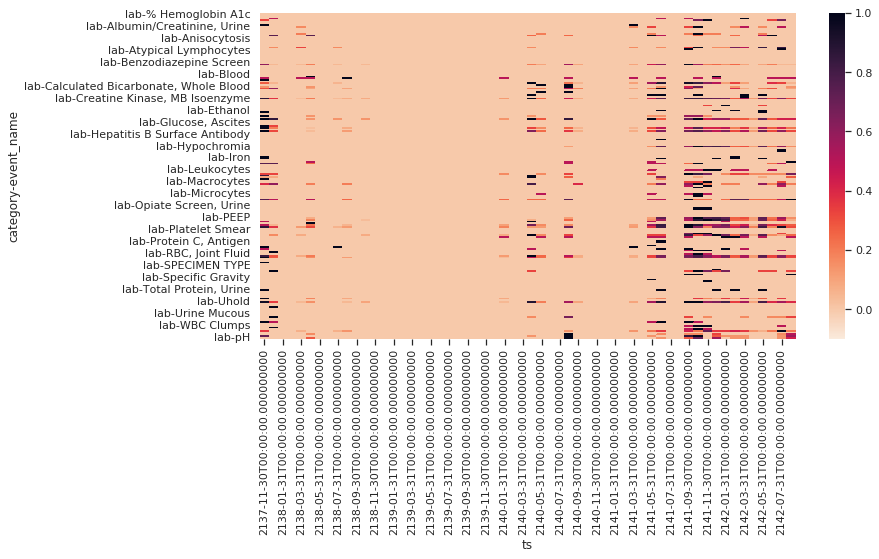

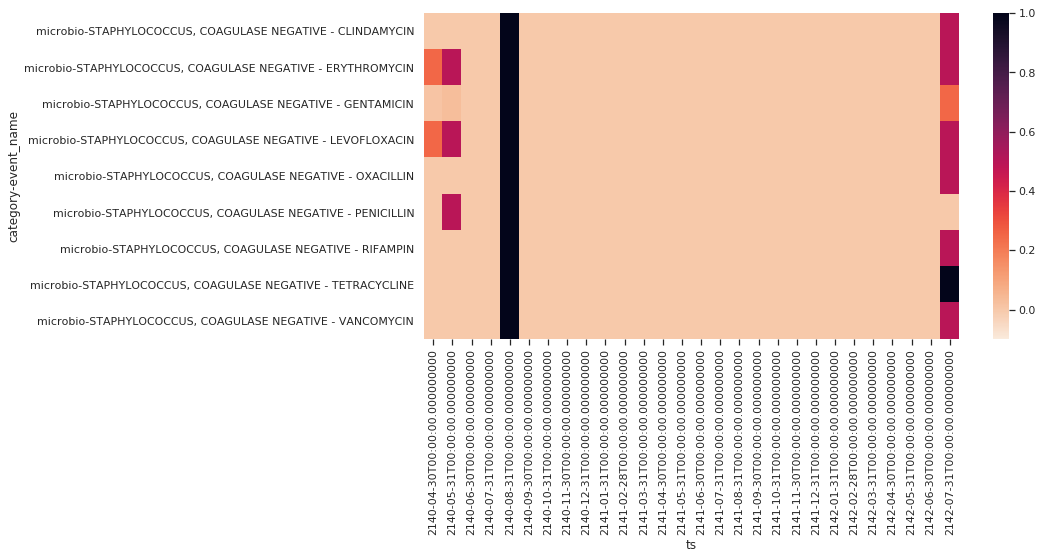

In [2]:
subject_id=109
adm_pivot, drug_pivot, lab_pivot, microbio_pivot = ts_pivot(subject_id, period_agg='M')
plot_ts(adm_pivot)
plot_ts(drug_pivot)
plot_ts(lab_pivot)
plot_ts(microbio_pivot)